<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Support_Vector_Machines_basic_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basic Idea

### Understanding Dimensions:

First, think of dimensions as different aspects or features of data.

1. **1-Dimension (1D)**: Imagine a straight line on which you mark points. Any point on this line can be described by just one number (its position on the line).
   
2. **2-Dimensions (2D)**: Now, think of a flat sheet of paper. Any point on this paper can be described by two numbers: its `x` and `y` coordinates. It's like a map or a graph plot.
   
3. **3-Dimensions (3D)**: Now imagine the space inside a room. Any point in this room can be described using three numbers: `x`, `y`, and `z` coordinates. It has depth in addition to length and width.

And so on... As we add more dimensions, it's harder for us to visualize, but mathematically, it's just about adding more coordinates.

### Transforming Data to Higher Dimensions:

Sometimes, data in 2D (like points on a sheet of paper) cannot be separated by a straight line. But if we could lift some of those points off the paper (adding a third dimension), we might be able to place a flat plane that separates the two classes.

The act of "lifting" data into a higher dimension is done using a mathematical function. This function takes the existing data and produces new features that represent higher dimensions.

### An Example:

Let's consider a simple example. Imagine we have two classes of points on a 2D plane. The points from one class are all inside a circle, and the points from the other class are outside the circle. Clearly, you can't draw a straight line to separate these two classes.

However, if we were to "lift" these points into 3D based on their distance from the center of the circle, the points inside the circle might be higher or lower than those outside. Now, in this 3D space, you could use a flat plane to separate the two classes.

### Why "Higher"?

When we say "higher dimension", it simply means adding more coordinates or features. If our data is originally in 2D (`x`, `y`), transforming to 3D would mean we're now working with (`x`, `y`, `z`). If we further move to 4D, we'd have one more coordinate, maybe `w`, and so on.

In the realm of SVM and the kernel trick, the transformation can potentially move data into infinitely many dimensions. However, as mentioned earlier, thanks to the kernel trick, we don't explicitly compute in this high-dimensional space, making the process computationally feasible.

In summary, the idea behind moving to higher dimensions is to make the data separable when it's not in the original space. The term "higher" simply denotes the addition of more coordinates or features.

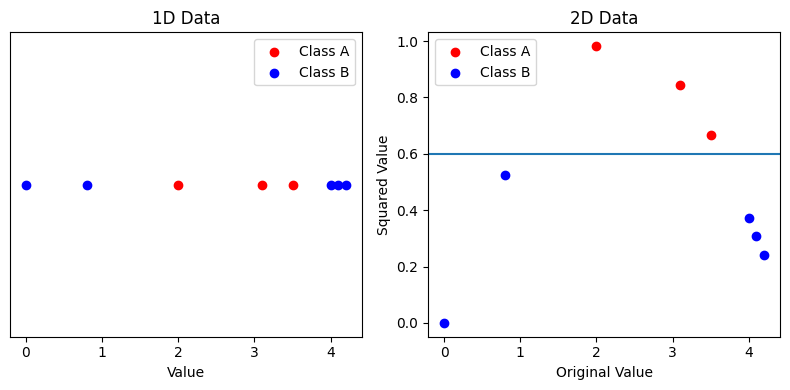

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Data
# class_A = np.array([1.9, 2.1, 2.0])
class_A = np.array([2, 3.1, 3.5])
class_B = np.array([0,0.8, 4.1, 4.2, 4.0])

plt.figure(figsize=(8, 4))

# Plot 1D Data
plt.subplot(1, 2, 1)
plt.scatter(class_A, [0]*len(class_A), color='red', label='Class A')
plt.scatter(class_B, [0]*len(class_B), color='blue', label='Class B')
plt.title('1D Data')
plt.xlabel('Value')
plt.yticks([])
plt.legend()

# Transform data to 2D
def transform_to_2D(x):
    #return [x, x**2]
    return [x, np.sin(x/1.45)]

class_A_2D = np.array([transform_to_2D(x) for x in class_A])
class_B_2D = np.array([transform_to_2D(x) for x in class_B])

# Plot 2D Data
plt.subplot(1, 2, 2)
plt.scatter(class_A_2D[:, 0], class_A_2D[:, 1], color='red', label='Class A')
plt.scatter(class_B_2D[:, 0], class_B_2D[:, 1], color='blue', label='Class B')
plt.title('2D Data')
plt.xlabel('Original Value')
plt.ylabel('Squared Value')

plt.axhline(y=0.6)

plt.legend()

plt.tight_layout()
plt.show()


##Kernel Trick

 Instead of explicitly transforming the data into a higher dimension (like we did with the sine function), the kernel trick computes the dot product between the transformed data points in this higher-dimensional space without ever actually going to that space. This is computationally efficient.


Instead of transforming them into 2D (or even higher dimensions) and then calculating the dot product, a kernel function can directly compute an equivalent dot product in the original 1D space.

The RBF (Radial Basis Function) kernel, polynomial kernel, and sigmoid kernel are examples of kernel functions that allow SVM to operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space.

##Example of 2D to 3D transformation

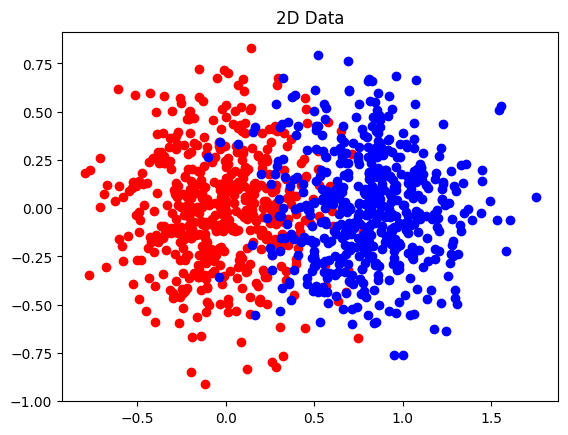

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(0)
N = 500
X1 = np.random.randn(N, 2) * 0.3
X2 = (np.random.randn(N, 2) * 0.3) + np.array([0.8, 0])
X = np.vstack([X1, X2])
y = np.array([0]*N + [1]*N)

# Plot in 2D
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue')
plt.title("2D Data")
plt.show()


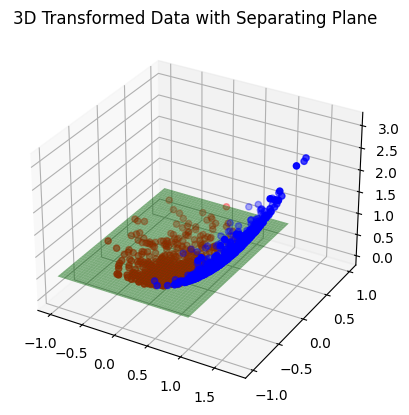

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Transform to 3D
Z = np.sum(X**2, axis=1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y==0][:, 0], X[y==0][:, 1], Z[y==0], color='red')
ax.scatter(X[y==1][:, 0], X[y==1][:, 1], Z[y==1], color='blue')

# Add separating plane
xx, yy = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
zz = 0.5 * np.ones_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.5, color='green')

plt.title("3D Transformed Data with Separating Plane")
plt.show()


##Lines Vs Planes

###A Line in a 2D space and be described as:
```
y = ax + b
```

where a is the slop, and b is the y intercept


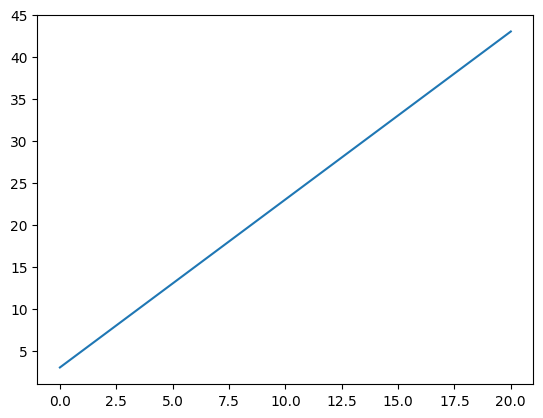

In [7]:
x = np.linspace(0,20, 100)

a = 2
b = 3

y = a*x + b

plt.plot(x,y)

###Equation of a plane in three-dimensional space.
```
ax+by+cz=d
```


x,y, and z are the coordinates of a point(x,y,z) in 3D space.



a,b, and c are constants that determine the orientation (or tilt) of the plane. Specifically, they are the components of the plane's normal vector. A "normal vector" is a vector that is perpendicular (or "normal") to the plane.



d is a constant that determines the offset of the plane from the origin. If d=0, the plane passes through the origin.

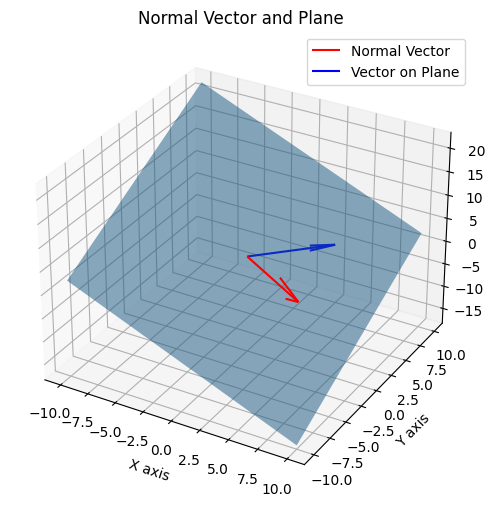

dot product:  0.0


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define plane equation: ax + by + cz = d
a, b, c, d = 2, -2, 2, 5

# Create a grid of x, y values
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x, y)

# Calculate corresponding z values
##    ax+by+cz = d
##       by+cz = d-ax
##          cz = d-ax-by
##           z = d-ax-by/c


Z = (d - a*X - b*Y) / c

# Normal vector [a, b, c]
normal = np.array([a, b, c])

# Two points on the plane
P1 = np.array([0, 0, d/c]) # Choosing x=0, y=0
P2 = np.array([1, 1, (d-a-b)/c]) # Choosing x=1, y=1

# Vector on the plane (P2 - P1)
v = P2 - P1

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(P1[0], P1[1], P1[2], normal[0], normal[1], normal[2], color='r', label='Normal Vector', length=5)
ax.quiver(P1[0], P1[1], P1[2], v[0], v[1], v[2], color='b', label='Vector on Plane', length=5)
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('Normal Vector and Plane')
ax.legend()
plt.show()
print("dot product: ", np.dot(v,normal))



###Example 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Line in 2D
x = np.linspace(-10, 10, 100)  # Generate 100 points between -10 and 10
a = 2
b = 0.5
y = a + b*x

plt.figure(figsize=(8, 6))
plt.plot(x, y, '-r', label='y=a+bx')
plt.title('Graph of y=a+bx')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# 2. Plane in 3D
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
a, b, c, d = 1, -2, 1, 5
Z = (d - a*X - b*Y) / c  # Solve for Z given X, Y

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('Graph of ax + by + cz = d')
plt.show()


##**Hyperplane: Definition and Concept**




A hyperplane is a subspace of one dimension less than the ambient space. In simpler terms:

1. In a **2-dimensional** space (a plane), a hyperplane is a **1-dimensional** line.
2. In a **3-dimensional** space, a hyperplane is a **2-dimensional** plane.
3. In higher dimensions (n-dimensional space), a hyperplane is an (n-1)-dimensional flat affine subspace.

So, you can think of a hyperplane as a "boundary" that splits the space into two half-spaces.

**Hyperplane in the Context of SVM**:

In the context of SVM, the hyperplane is used as a decision boundary to separate different classes in a dataset. The optimal hyperplane is the one that maximizes the margin between two classes. In simple binary classification tasks, the SVM aims to find the hyperplane that has the maximum distance from it to the nearest data point of each class, ensuring the best separation.

**Why is it called a "hyper" plane?**

The term "hyper" is used because this concept generalizes beyond our usual 3D space into higher dimensions. In 3D, it's just a plane, but when we move to 4D, 5D, and so on, we can't visualize it, but mathematically, it behaves like a "plane" that separates the space, hence "hyperplane."

**Equation of a Hyperplane**:
A hyperplane can be defined mathematically (in a n-dimensional space) as:
\[ w  dot x + b = 0 \]
where:
- \( w \) is the weight vector, perpendicular to the hyperplane.
- \( x \) is the input data (a point in n-dimensional space).
- \( b \) is the bias, a scalar value.

When you input a data point \( x \) into this equation, if the result is positive, it lies on one side of the hyperplane; if negative, it's on the other side. If the result is zero, it lies exactly on the hyperplane.

##General Hyperplane Equation

```
b0 + b1*x1 + b2*x2 ... bn*xn = 0
```

##Seperating Hyperplane

```
b0 + sum(bn*xn) > 0
b0 + sum(bn*xn) < 0

```

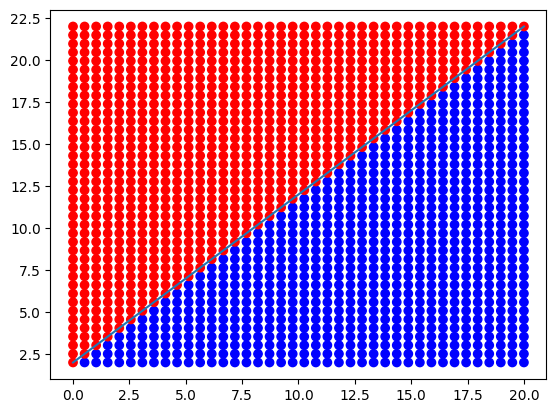

In [20]:
x = np.linspace(0, 20, 40)

b1 = 1
b0 = 2

y = b0 + b1*x

X, Y = np.meshgrid(x, y)

# Calculate values using the line equation
Z = b1 * X + b0 - Y

# Color points based on their position relative to the line
colors = np.where(Z > 0, 'blue', 'red')  # Above the line = blue, below = red

plt.scatter(X, Y, c=colors.flatten())
plt.plot(x,y)

#Support Vector Machines

##Max Margin Classifier

* refers specifically to the linear SVM.

* The primary goal of the Max Margin Classifier is to find the hyperplane that has the maximum margin from the nearest data points of two classes in a binary classification problem.

* This hyperplane provides the best generalization ability.

* Data is assumed to be linearly separable.

* This classifier doesn't work well if the data isn't perfectly linearly separable because even a single outlier can greatly distort the hyperplane.

##Support Vector Classifier (or Soft Margin Classifier)

This is an extension of the Max Margin Classifier to handle cases where data is not perfectly linearly separable.

* It allows for some misclassification by introducing slack variables. These slack variables capture the misclassification and the margin violations.

* The objective becomes finding a balance between maximizing the margin and minimizing the misclassifications (or margin violations).

* This results in a "soft margin" where some data points may fall within the margin or even on the wrong side of the hyperplane.

* This makes the classifier more robust, especially in the presence of noisy or overlapping data.









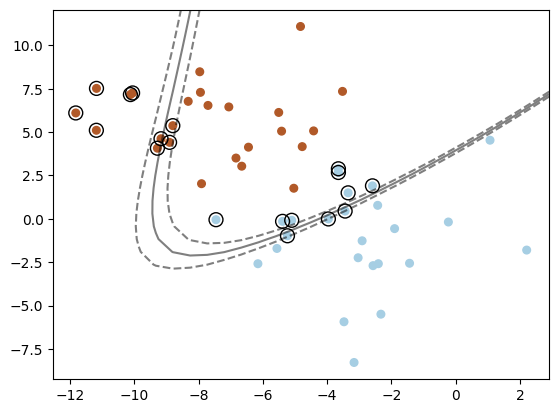

In [39]:
from sklearn import datasets
from sklearn.svm import SVC

# Load a simple dataset
data = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=2.2)
X = data[0]
y = data[1]

# Train an SVM with a linear kernel ###Max Margin Classifier###
#clf = SVC(kernel='linear', C=1e10)
#clf = SVC(kernel='linear', C=1000)
#clf = SVC(kernel='linear', C=10)
#clf = SVC(kernel='linear', C=1)
#clf = SVC(kernel='linear', C=0.05)
#clf = SVC(kernel='linear', C=0.005)

###As C becomes smaller, we allow more points in the margin


# Train an SVM with a non-linear kernel
#clf = SVC(kernel='rbf', C=10)   ###Radial basis function
#clf = SVC(kernel='poly', C=10)
clf = SVC(kernel='sigmoid', C=10)

clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors (the vectors that define the margin)
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.show()


##Support Vector Machines (SVMs)



* SVMs generalize the concept of the SVC to more complex decision boundaries using "kernels."

* Instead of linear decision boundaries, SVMs can produce non-linear decision boundaries by mapping input data into higher-dimensional spaces.

* The decision boundary in this higher-dimensional space might be linear (like a hyperplane), but when mapped back to the original space, it appears non-linear.

In practice, when people refer to the "Support Vector Classifier," they often mean the soft-margin version, which allows for some flexibility in classifying non-linearly separable data. The "Max Margin Classifier," on the other hand, strictly refers to the hyperplane that provides the maximum margin in linearly separable datasets.

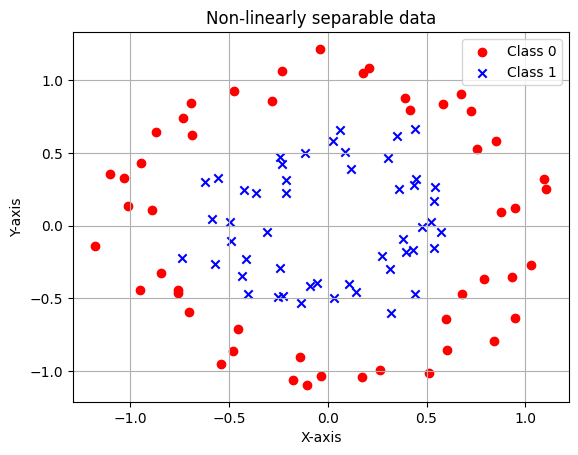

In [10]:
from sklearn.datasets import make_circles

# Generate dummy data
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1)





# Visualize the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
plt.legend()
plt.title("Non-linearly separable data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


Accuracy: 1.0


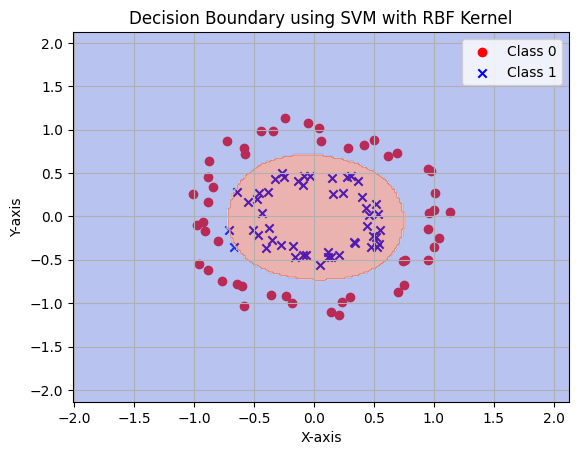

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Generate and visualize dummy data
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train an SVM with radial basis function (RBF) kernel
clf = SVC(kernel='rbf', C=1)
clf.fit(X_train, y_train)

# 4. Test the SVM model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# 5. Visualize the decision boundary
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')

# Create a grid to plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

plt.legend()
plt.title("Decision Boundary using SVM with RBF Kernel")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()
